# 1. LTV

In [46]:
import pandas as pd
import numpy as np


In [47]:
data = pd.read_csv('MMM_data.csv')

In [48]:
data[data['결제 완료'] == 'Yes']

,사용자 ID,가입 날짜,유입 경로,방문 날짜,페이지 방문 순서,장바구니 담기,결제 완료,결제 방식,디바이스 정보,마지막 방문 날짜
1,1001,2024-03-22,Coupang Ads,2024-04-06,홈 > 카테고리 > 제품 목록 > 제품 상세 > 장바구니 > 상품 상세 > 결제 >...,Yes,Yes,네이버페이,Desktop,2024-07-26
2,1001,2024-03-22,Google Search,2024-07-10,홈 > 검색 > 제품 상세 > 장바구니 > 상품 상세 > 결제 > 주문 확인,Yes,Yes,카카오페이,Mobile,2024-07-26
4,1001,2024-03-22,Naver Search,2024-07-26,홈 > 카테고리 > 제품 목록 > 제품 상세 > 장바구니 > 상품 상세 > 결제 >...,Yes,Yes,네이버페이,Mobile,2024-07-26
5,1002,2024-02-27,YouTube Ads,2024-03-07,홈 > 카테고리 > 제품 목록 > 상품 상세 > 주문 확인 > 결제,Yes,Yes,토스,Mobile,2024-07-15
10,1003,2024-01-30,Instagram Ads,2024-03-05,홈 > 카테고리 > 제품 목록 > 제품 상세 > 장바구니 > 상품 상세 > 결제 >...,Yes,Yes,카카오페이,Mobile,2024-07-26
...,...,...,...,...,...,...,...,...,...,...
5347,2985,2024-07-09,Naver Shopping,2024-07-22,홈 > 카테고리 > 제품 목록 > 제품 상세 > 리뷰 > 장바구니 > 상품 상세 >...,Yes,Yes,무통장 입금,Mobile,2024-07-22
5348,2988,2024-07-12,Naver Shopping,2024-07-31,홈 > 검색 > 제품 상세 > 장바구니 > 상품 상세 > 결제 > 주문 확인,Yes,Yes,무통장 입금,Desktop,2024-07-31
5349,2989,2024-07-01,Instagram Ads,2024-07-07,홈 > 검색 > 제품 목록 > 제품 상세 > 리뷰 > 장바구니 > 상품 상세 > 결...,Yes,Yes,토스,Mobile,2024-07-26
5350,2989,2024-07-01,Google Search,2024-07-26,홈 > 카테고리 > 제품 목록 > 제품 상세 > 리뷰 > 장바구니 > 상품 상세 >...,Yes,Yes,무통장 입금,Mobile,2024-07-26


/opt/conda/pubenvs/skku_dmlab/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: Glyph 52572 (\N{HANGUL SYLLABLE COE}) missing from current font.
/opt/conda/pubenvs/skku_dmlab/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from current font.
/opt/conda/pubenvs/skku_dmlab/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from current font.
/opt/conda/pubenvs/skku_dmlab/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: Glyph 47928 (\N{HANGUL SYLLABLE MUN}) missing from current font.
/opt/conda/pubenvs/skku_dmlab/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from current font.
/opt/conda/pubenvs/skku_dmlab/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from current font.
/opt/conda/pubenvs/skku_dm

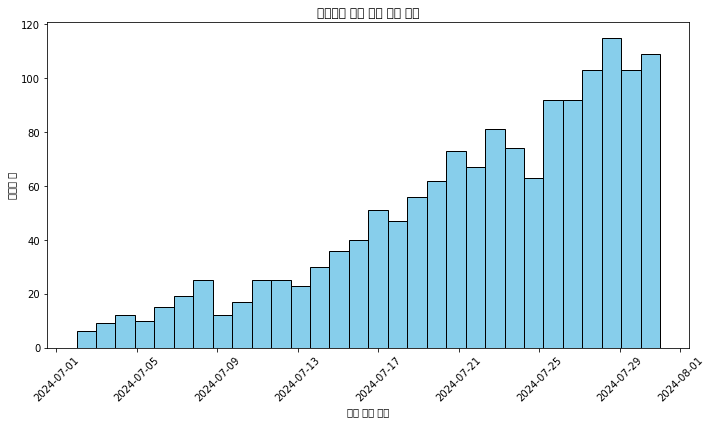

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# 기존 데이터프레임을 새로운 변수에 할당
df_eda = data.copy()

# '방문 날짜'를 datetime 형식으로 변환 (이미 datetime 형식이면 생략 가능)
df_eda['방문 날짜'] = pd.to_datetime(df_eda['방문 날짜'])

# 사용자 ID별 최종 방문 날짜 추출
last_visit_dates = df_eda.groupby('사용자 ID')['방문 날짜'].max().reset_index()

# 최종 방문 날짜를 시각화 (히스토그램)
plt.figure(figsize=(10, 6))
plt.hist(last_visit_dates['방문 날짜'], bins=30, color='skyblue', edgecolor='black')
plt.title('아이디별 최종 방문 날짜 분포')
plt.xlabel('최종 방문 날짜')
plt.ylabel('사용자 수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [50]:
len(data['사용자 ID'].unique())

1492

## 1) 평균 구매 금액


In [51]:

# 결제 완료된 트랜잭션만 필터링
completed_transactions = data[data['결제 완료'] == 'Yes']
# 고객별 평균 구매 금액 계산 (결제 금액 컬럼이 있으면 그것을 사용)
avg_order_value = completed_transactions.groupby('사용자 ID')['결제 방식'].count()  # 결제 금액을 사용해야 함


## 2) 구매 빈도 계산

In [52]:
# 고객별 구매 빈도 계산 (중복된 사용자 ID 기반)
purchase_frequency = completed_transactions.groupby('사용자 ID')['방문 날짜'].nunique()


## 3) 고객 유지 기간


In [53]:
# 가입 날짜와 마지막 방문 날짜 차이를 사용해 고객 유지 기간 계산
data['가입 날짜'] = pd.to_datetime(data['가입 날짜'])
data['마지막 방문 날짜'] = pd.to_datetime(data['마지막 방문 날짜'])
data['고객 유지 기간'] = (data['마지막 방문 날짜'] - data['가입 날짜']).dt.days

# 고객별 유지 기간 평균 계산
customer_lifespan = data.groupby('사용자 ID')['고객 유지 기간'].mean()


In [55]:
from datetime import timedelta

# 이탈 기준: 30일 동안 재방문하지 않으면 이탈로 간주
inactivity_threshold = 30  # 30일

# 현재 시각을 2024년 8월 20일로 설정
current_date = pd.Timestamp('2024-08-20')

# 이탈 여부를 30일 기준으로 다시 계산
data['이탈 여부'] = data['마지막 방문 날짜'].apply(lambda x: 'Yes' if (current_date - x).days > 30 else 'No')

# 업데이트된 이탈 여부 확인
data[['사용자 ID', '마지막 방문 날짜', '이탈 여부']].head()



,사용자 ID,마지막 방문 날짜,이탈 여부
0,1001,2024-07-26,No
1,1001,2024-07-26,No
2,1001,2024-07-26,No
3,1001,2024-07-26,No
4,1001,2024-07-26,No


In [57]:
data[data['이탈 여부'] == 'Yes']

,사용자 ID,가입 날짜,유입 경로,방문 날짜,페이지 방문 순서,장바구니 담기,결제 완료,결제 방식,디바이스 정보,마지막 방문 날짜,고객 유지 기간,이탈 여부
5,1002,2024-02-27,YouTube Ads,2024-03-07,홈 > 카테고리 > 제품 목록 > 상품 상세 > 주문 확인 > 결제,Yes,Yes,토스,Mobile,2024-07-15,139,Yes
6,1002,2024-02-27,YouTube Ads,2024-04-04,홈 > 검색 > 제품 상세 > 장바구니 > 주문 확인,Yes,No,-,Tablet,2024-07-15,139,Yes
7,1002,2024-02-27,Instagram Ads,2024-04-14,홈 > 검색 > 제품 상세 > 주문 확인,No,No,-,Mobile,2024-07-15,139,Yes
8,1002,2024-02-27,Facebook Ads,2024-07-15,홈 > 카테고리 > 제품 목록 > 제품 상세 > 리뷰 > 장바구니,Yes,No,-,Tablet,2024-07-15,139,Yes
44,1012,2024-01-11,Google Search,2024-01-14,홈 > 카테고리 > 제품 목록 > 제품 상세 > 주문 확인,No,No,-,Desktop,2024-07-13,184,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
5311,2941,2024-07-06,Naver Shopping,2024-07-19,홈 > 검색 > 제품 상세 > 장바구니,Yes,No,-,Mobile,2024-07-19,13,Yes
5331,2965,2024-07-06,Coupang Ads,2024-07-17,홈 > 검색 > 제품 목록 > 제품 상세 > 리뷰 > 장바구니 > 주문 확인,Yes,No,-,Desktop,2024-07-17,11,Yes
5333,2971,2024-07-16,Instagram Ads,2024-07-19,홈 > 검색 > 제품 상세 > 장바구니 > 상품 상세 > 결제 > 주문 확인,Yes,Yes,삼성페이,Desktop,2024-07-19,3,Yes
5341,2978,2024-07-09,Instagram Ads,2024-07-12,홈 > 카테고리 > 제품 목록,No,No,-,Mobile,2024-07-12,3,Yes


## 4) 이탈율 계산


In [58]:
# 이탈율 계산 (이탈 여부 Yes인 사용자 비율)
churn_rate = data['이탈 여부'].value_counts(normalize=True).get('Yes', 0)


In [61]:
churn_rate

0.3645697218592496

## 5) LTV 계산


In [59]:
# LTV = 평균 구매 금액 * 구매 빈도 * 고객 유지 기간
ltv = avg_order_value * purchase_frequency * customer_lifespan


In [60]:
ltv

사용자 ID
1001    1134.0
1002     139.0
1003     712.0
1004     130.0
1005       NaN
         ...  
2992       NaN
2994       NaN
2995       NaN
2996       NaN
2998       NaN
Length: 1492, dtype: float64

In [66]:
churn_data

,사용자 ID,가입 날짜,유입 경로,방문 날짜,페이지 방문 순서,장바구니 담기,결제 완료,결제 방식,디바이스 정보,마지막 방문 날짜,고객 유지 기간
0,1001,2024-03-22,Coupang Ads,2024-03-23,홈 > 검색 > 제품 상세 > 주문 확인,No,No,-,Desktop,2024-07-26,126
1,1001,2024-03-22,Coupang Ads,2024-04-06,홈 > 카테고리 > 제품 목록 > 제품 상세 > 장바구니 > 상품 상세 > 결제 >...,Yes,Yes,네이버페이,Desktop,2024-07-26,126
2,1001,2024-03-22,Google Search,2024-07-10,홈 > 검색 > 제품 상세 > 장바구니 > 상품 상세 > 결제 > 주문 확인,Yes,Yes,카카오페이,Mobile,2024-07-26,126
3,1001,2024-03-22,Naver Search,2024-07-22,홈 > 검색 > 제품 목록 > 제품 상세 > 리뷰 > 장바구니 > 주문 확인,Yes,No,-,Desktop,2024-07-26,126
4,1001,2024-03-22,Naver Search,2024-07-26,홈 > 카테고리 > 제품 목록 > 제품 상세 > 장바구니 > 상품 상세 > 결제 >...,Yes,Yes,네이버페이,Mobile,2024-07-26,126
...,...,...,...,...,...,...,...,...,...,...,...
5352,2992,2024-07-23,Coupang Ads,2024-07-31,홈 > 카테고리 > 제품 목록 > 제품 상세 > 리뷰 > 장바구니,Yes,No,-,Mobile,2024-07-31,8
5353,2994,2024-07-28,Naver Shopping,2024-07-31,홈 > 카테고리 > 제품 목록,No,No,-,Mobile,2024-07-31,3
5354,2995,2024-07-09,Tistory Blog,2024-07-15,홈 > 검색 > 제품 상세 > 장바구니 > 주문 확인,Yes,No,-,Mobile,2024-07-15,6
5355,2996,2024-07-25,Google Search,2024-07-30,홈 > 카테고리 > 제품 목록 > 제품 상세 > 리뷰 > 장바구니 > 주문 확인,Yes,No,-,Mobile,2024-07-30,5


# 2. 이탈율 예측

In [91]:
churn_data = pd.read_csv('MMM_data.csv')

In [98]:
def calculate_median_visit_interval_fixed(data):
    """
    사용자 ID별 중앙 방문 주기를 계산하고 NaN 값을 0으로 대체하여 경고를 방지하는 함수.
    
    Parameters:
    - data (DataFrame): 사용자 데이터를 포함한 DataFrame
    
    Returns:
    - data (DataFrame): 중앙 방문 주기를 추가한 DataFrame
    """
    # 방문 날짜를 datetime 형식으로 변환
    data['방문 날짜'] = pd.to_datetime(data['방문 날짜'])
    
    # 사용자 ID별로 방문 날짜 간격(차이)을 계산 (날짜 차이를 일수로 변환)
    visit_intervals = data.groupby('사용자 ID')['방문 날짜'].diff().dt.days
    
    # 사용자 ID별 중앙 방문 주기 계산 (NaN 값 발생 시 0으로 대체)
    median_visit_interval = data.groupby('사용자 ID')['방문 날짜'].apply(lambda x: x.diff().dt.days.median(skipna=True))
    
    # 중앙 방문 주기를 사용자 ID별로 추가
    data = data.merge(median_visit_interval.rename('중앙 방문 주기'), on='사용자 ID', how='left')
    
    # NaN 값을 0으로 대체 (한 번만 방문한 경우)
    data['중앙 방문 주기'] = data['중앙 방문 주기'].fillna(0)
    
    return data

In [99]:

# 함수 적용
data_with_median_visit_interval = calculate_median_visit_interval_fixed(churn_data)



/opt/conda/pubenvs/skku_dmlab/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/pubenvs/skku_dmlab/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/pubenvs/skku_dmlab/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/pubenvs/skku_dmlab/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/pubenvs/skku_dmlab/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/pubenvs/skku_dmlab/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1

In [101]:
data_with_median_visit_interval

,사용자 ID,가입 날짜,유입 경로,방문 날짜,페이지 방문 순서,장바구니 담기,결제 완료,결제 방식,디바이스 정보,마지막 방문 날짜,중앙 방문 주기
0,1001,2024-03-22,Coupang Ads,2024-03-23,홈 > 검색 > 제품 상세 > 주문 확인,No,No,-,Desktop,2024-07-26,13.0
1,1001,2024-03-22,Coupang Ads,2024-04-06,홈 > 카테고리 > 제품 목록 > 제품 상세 > 장바구니 > 상품 상세 > 결제 >...,Yes,Yes,네이버페이,Desktop,2024-07-26,13.0
2,1001,2024-03-22,Google Search,2024-07-10,홈 > 검색 > 제품 상세 > 장바구니 > 상품 상세 > 결제 > 주문 확인,Yes,Yes,카카오페이,Mobile,2024-07-26,13.0
3,1001,2024-03-22,Naver Search,2024-07-22,홈 > 검색 > 제품 목록 > 제품 상세 > 리뷰 > 장바구니 > 주문 확인,Yes,No,-,Desktop,2024-07-26,13.0
4,1001,2024-03-22,Naver Search,2024-07-26,홈 > 카테고리 > 제품 목록 > 제품 상세 > 장바구니 > 상품 상세 > 결제 >...,Yes,Yes,네이버페이,Mobile,2024-07-26,13.0
...,...,...,...,...,...,...,...,...,...,...,...
5352,2992,2024-07-23,Coupang Ads,2024-07-31,홈 > 카테고리 > 제품 목록 > 제품 상세 > 리뷰 > 장바구니,Yes,No,-,Mobile,2024-07-31,0.0
5353,2994,2024-07-28,Naver Shopping,2024-07-31,홈 > 카테고리 > 제품 목록,No,No,-,Mobile,2024-07-31,0.0
5354,2995,2024-07-09,Tistory Blog,2024-07-15,홈 > 검색 > 제품 상세 > 장바구니 > 주문 확인,Yes,No,-,Mobile,2024-07-15,0.0
5355,2996,2024-07-25,Google Search,2024-07-30,홈 > 카테고리 > 제품 목록 > 제품 상세 > 리뷰 > 장바구니 > 주문 확인,Yes,No,-,Mobile,2024-07-30,0.0


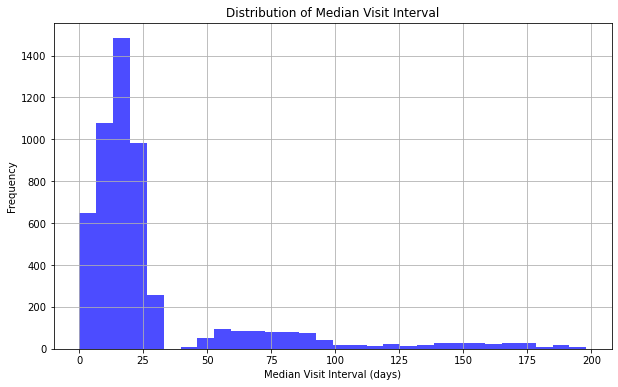

In [102]:
    plt.figure(figsize=(10, 6))
    plt.hist(data_with_median_visit_interval['중앙 방문 주기'], bins=30, color='blue', alpha=0.7)
    plt.title('Distribution of Median Visit Interval')
    plt.xlabel('Median Visit Interval (days)')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


In [110]:
def calculate_customer_lifespan(data):
    """
    고객 유지 기간을 계산하는 함수.
    가입 날짜와 마지막 방문 날짜의 차이를 사용해 유지 기간을 계산하고, 고객별 유지 기간을 반환.
    
    Parameters:
    - data (DataFrame): 사용자 데이터를 포함한 DataFrame
    
    Returns:
    - data (DataFrame): '고객 유지 기간' 열을 포함한 DataFrame
    """
    # 가입 날짜와 마지막 방문 날짜 차이 계산
    data['가입 날짜'] = pd.to_datetime(data['가입 날짜'])
    data['마지막 방문 날짜'] = pd.to_datetime(data['마지막 방문 날짜'])
    data['고객 유지 기간'] = (data['마지막 방문 날짜'] - data['가입 날짜']).dt.days

    return data


In [111]:
# 함수 적용
data_with_lifespan = calculate_customer_lifespan(data_with_median_visit_interval)



In [112]:
data_with_lifespan

,사용자 ID,가입 날짜,유입 경로,방문 날짜,페이지 방문 순서,장바구니 담기,결제 완료,결제 방식,디바이스 정보,마지막 방문 날짜,중앙 방문 주기,고객 유지 기간
0,1001,2024-03-22,Coupang Ads,2024-03-23,홈 > 검색 > 제품 상세 > 주문 확인,No,No,-,Desktop,2024-07-26,13.0,126
1,1001,2024-03-22,Coupang Ads,2024-04-06,홈 > 카테고리 > 제품 목록 > 제품 상세 > 장바구니 > 상품 상세 > 결제 >...,Yes,Yes,네이버페이,Desktop,2024-07-26,13.0,126
2,1001,2024-03-22,Google Search,2024-07-10,홈 > 검색 > 제품 상세 > 장바구니 > 상품 상세 > 결제 > 주문 확인,Yes,Yes,카카오페이,Mobile,2024-07-26,13.0,126
3,1001,2024-03-22,Naver Search,2024-07-22,홈 > 검색 > 제품 목록 > 제품 상세 > 리뷰 > 장바구니 > 주문 확인,Yes,No,-,Desktop,2024-07-26,13.0,126
4,1001,2024-03-22,Naver Search,2024-07-26,홈 > 카테고리 > 제품 목록 > 제품 상세 > 장바구니 > 상품 상세 > 결제 >...,Yes,Yes,네이버페이,Mobile,2024-07-26,13.0,126
...,...,...,...,...,...,...,...,...,...,...,...,...
5352,2992,2024-07-23,Coupang Ads,2024-07-31,홈 > 카테고리 > 제품 목록 > 제품 상세 > 리뷰 > 장바구니,Yes,No,-,Mobile,2024-07-31,0.0,8
5353,2994,2024-07-28,Naver Shopping,2024-07-31,홈 > 카테고리 > 제품 목록,No,No,-,Mobile,2024-07-31,0.0,3
5354,2995,2024-07-09,Tistory Blog,2024-07-15,홈 > 검색 > 제품 상세 > 장바구니 > 주문 확인,Yes,No,-,Mobile,2024-07-15,0.0,6
5355,2996,2024-07-25,Google Search,2024-07-30,홈 > 카테고리 > 제품 목록 > 제품 상세 > 리뷰 > 장바구니 > 주문 확인,Yes,No,-,Mobile,2024-07-30,0.0,5


In [113]:
def calculate_churn_status(data, inactivity_threshold=30, current_date_str='2024-08-20'):
    """
    이탈 여부를 계산하는 함수.
    고객이 일정 기간(기본 30일) 동안 재방문하지 않으면 이탈로 간주.
    
    Parameters:
    - data (DataFrame): 사용자 데이터를 포함한 DataFrame
    - inactivity_threshold (int): 이탈로 간주하는 비활동 일수 기준 (기본값: 30일)
    - current_date_str (str): 기준 날짜, 형식은 'YYYY-MM-DD' (기본값: '2024-08-20')
    
    Returns:
    - data (DataFrame): 이탈 여부를 포함한 원본 DataFrame
    """
    current_date = pd.Timestamp(current_date_str)
    
    # 이탈 여부 계산
    data['이탈 여부'] = data['마지막 방문 날짜'].apply(lambda x: 'Yes' if (current_date - x).days > inactivity_threshold else 'No')
    
    return data




In [114]:
# 함수 적용 테스트

updated_data = calculate_churn_status(data_with_lifespan)

In [115]:
updated_data

,사용자 ID,가입 날짜,유입 경로,방문 날짜,페이지 방문 순서,장바구니 담기,결제 완료,결제 방식,디바이스 정보,마지막 방문 날짜,중앙 방문 주기,고객 유지 기간,이탈 여부
0,1001,2024-03-22,Coupang Ads,2024-03-23,홈 > 검색 > 제품 상세 > 주문 확인,No,No,-,Desktop,2024-07-26,13.0,126,No
1,1001,2024-03-22,Coupang Ads,2024-04-06,홈 > 카테고리 > 제품 목록 > 제품 상세 > 장바구니 > 상품 상세 > 결제 >...,Yes,Yes,네이버페이,Desktop,2024-07-26,13.0,126,No
2,1001,2024-03-22,Google Search,2024-07-10,홈 > 검색 > 제품 상세 > 장바구니 > 상품 상세 > 결제 > 주문 확인,Yes,Yes,카카오페이,Mobile,2024-07-26,13.0,126,No
3,1001,2024-03-22,Naver Search,2024-07-22,홈 > 검색 > 제품 목록 > 제품 상세 > 리뷰 > 장바구니 > 주문 확인,Yes,No,-,Desktop,2024-07-26,13.0,126,No
4,1001,2024-03-22,Naver Search,2024-07-26,홈 > 카테고리 > 제품 목록 > 제품 상세 > 장바구니 > 상품 상세 > 결제 >...,Yes,Yes,네이버페이,Mobile,2024-07-26,13.0,126,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5352,2992,2024-07-23,Coupang Ads,2024-07-31,홈 > 카테고리 > 제품 목록 > 제품 상세 > 리뷰 > 장바구니,Yes,No,-,Mobile,2024-07-31,0.0,8,No
5353,2994,2024-07-28,Naver Shopping,2024-07-31,홈 > 카테고리 > 제품 목록,No,No,-,Mobile,2024-07-31,0.0,3,No
5354,2995,2024-07-09,Tistory Blog,2024-07-15,홈 > 검색 > 제품 상세 > 장바구니 > 주문 확인,Yes,No,-,Mobile,2024-07-15,0.0,6,Yes
5355,2996,2024-07-25,Google Search,2024-07-30,홈 > 카테고리 > 제품 목록 > 제품 상세 > 리뷰 > 장바구니 > 주문 확인,Yes,No,-,Mobile,2024-07-30,0.0,5,No


만약 이탈 여부를 나타내는 컬럼이 있다면, 다음 설명변수들을 활용하여 이탈율을 예측할 수 있습니다. 당신이 제공한 데이터에서 유의미한 설명변수를 기반으로 고객의 이탈 가능성을 분석할 수 있습니다:

1. 가입 날짜
가입 기간: 고객이 가입한 후 경과한 시간은 이탈율에 중요한 영향을 미칠 수 있습니다. 오랜 기간 가입한 고객은 이탈 가능성이 더 낮을 수 있습니다.
2. 유입 경로
유입 채널: 고객이 어떤 경로로 유입되었는지 (광고, 검색 엔진 등)에 따라 이탈율이 다르게 나타날 수 있습니다. 예를 들어, 광고로 유입된 고객이 이탈율이 더 높을 수도 있습니다.
3. 페이지 방문 순서
페이지 방문 흐름: 특정 페이지 방문 순서가 이탈율에 영향을 줄 수 있습니다. 예를 들어, 제품 상세 페이지를 방문한 후 결제 페이지로 이동하지 않고 이탈하는 경우가 많다면, 이러한 패턴을 파악하여 설명변수로 활용할 수 있습니다.
4. 장바구니 담기 여부
장바구니 담기: 고객이 장바구니에 상품을 추가했는지 여부는 구매 가능성과 이탈 가능성을 나타내는 중요한 지표입니다. 장바구니에 상품을 담지 않는 고객은 이탈할 확률이 높을 수 있습니다.
5. 결제 완료 여부
결제 완료: 결제까지 완료한 고객은 이탈 가능성이 낮을 수 있습니다. 결제 실패나 결제 완료를 설명변수로 활용할 수 있습니다.
6. 디바이스 정보
디바이스 유형: 모바일, 데스크탑 등 디바이스 정보에 따라 고객의 이탈율이 달라질 수 있습니다. 예를 들어, 모바일 사용자의 이탈율이 더 높거나 낮을 수 있습니다.
7. 방문 날짜 및 마지막 방문 날짜
최근 방문 여부: 고객의 마지막 방문 날짜와 이탈 사이에는 강한 상관관계가 있을 수 있습니다. 오랫동안 방문하지 않은 고객일수록 이탈 가능성이 높습니다.
방문 빈도: 고객이 얼마나 자주 방문했는지도 이탈 예측에 중요한 변수입니다. 방문 빈도가 낮아지면 이탈 가능성이 높아질 수 있습니다.
8. 결제 방식
결제 방식: 다양한 결제 수단 (예: 네이버페이, 카카오페이 등)이 고객 이탈에 어떤 영향을 미치는지 분석할 수 있습니다. 특정 결제 방식을 주로 사용하는 고객은 더 충성도가 높을 수 있습니다.
추가로 고려할 수 있는 파생 변수:
구매 주기: 구매 주기를 계산하여, 규칙적인 구매 패턴을 가진 고객은 이탈 가능성이 더 낮을 것으로 예상할 수 있습니다.
세션 길이: 고객이 한 번 방문할 때 머무는 평균 시간도 유용한 변수입니다. 세션 시간이 짧으면 이탈 가능성이 높을 수 있습니다.
이 변수들을 활용하여 이탈율을 예측하는 머신러닝 모델을 구축할 수 있습니다. 추가로, 이 변수를 기반으로 다양한 모델(예: 로지스틱 회귀, 랜덤 포레스트, XGBoost 등)을 적용하고, 각 변수의 중요도를 분석할 수 있습니다.

## 페이지 방문 순서 Engineering

In [116]:
data_eng = updated_data

In [117]:
data_eng

,사용자 ID,가입 날짜,유입 경로,방문 날짜,페이지 방문 순서,장바구니 담기,결제 완료,결제 방식,디바이스 정보,마지막 방문 날짜,중앙 방문 주기,고객 유지 기간,이탈 여부
0,1001,2024-03-22,Coupang Ads,2024-03-23,홈 > 검색 > 제품 상세 > 주문 확인,No,No,-,Desktop,2024-07-26,13.0,126,No
1,1001,2024-03-22,Coupang Ads,2024-04-06,홈 > 카테고리 > 제품 목록 > 제품 상세 > 장바구니 > 상품 상세 > 결제 >...,Yes,Yes,네이버페이,Desktop,2024-07-26,13.0,126,No
2,1001,2024-03-22,Google Search,2024-07-10,홈 > 검색 > 제품 상세 > 장바구니 > 상품 상세 > 결제 > 주문 확인,Yes,Yes,카카오페이,Mobile,2024-07-26,13.0,126,No
3,1001,2024-03-22,Naver Search,2024-07-22,홈 > 검색 > 제품 목록 > 제품 상세 > 리뷰 > 장바구니 > 주문 확인,Yes,No,-,Desktop,2024-07-26,13.0,126,No
4,1001,2024-03-22,Naver Search,2024-07-26,홈 > 카테고리 > 제품 목록 > 제품 상세 > 장바구니 > 상품 상세 > 결제 >...,Yes,Yes,네이버페이,Mobile,2024-07-26,13.0,126,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5352,2992,2024-07-23,Coupang Ads,2024-07-31,홈 > 카테고리 > 제품 목록 > 제품 상세 > 리뷰 > 장바구니,Yes,No,-,Mobile,2024-07-31,0.0,8,No
5353,2994,2024-07-28,Naver Shopping,2024-07-31,홈 > 카테고리 > 제품 목록,No,No,-,Mobile,2024-07-31,0.0,3,No
5354,2995,2024-07-09,Tistory Blog,2024-07-15,홈 > 검색 > 제품 상세 > 장바구니 > 주문 확인,Yes,No,-,Mobile,2024-07-15,0.0,6,Yes
5355,2996,2024-07-25,Google Search,2024-07-30,홈 > 카테고리 > 제품 목록 > 제품 상세 > 리뷰 > 장바구니 > 주문 확인,Yes,No,-,Mobile,2024-07-30,0.0,5,No


## 1) 페이지 흐름의 길이 계산 (Length of Visit Path)

In [118]:
data_eng['페이지 방문 길이'] = data_eng['페이지 방문 순서'].apply(lambda x: len(x.split('>')))


## 2) 주요 페이지 카테고리 추출


In [120]:
data_eng['장바구니 방문 여부'] = data_eng['페이지 방문 순서'].apply(lambda x: 1 if '장바구니' in x else 0)


## 3) 페이지 방문 순서의 주요 흐름 카테고리화


In [121]:
def categorize_visit_path(path):
    if '장바구니' in path and '결제' in path:
        return '구매 완료'
    elif '장바구니' in path:
        return '장바구니 확인'
    else:
        return '일반 탐색'

data_eng['방문 경로 카테고리'] = data_eng['페이지 방문 순서'].apply(categorize_visit_path)


## 4) 방문 순서에서 마지막 페이지 추출


In [124]:
data_eng['마지막 방문 페이지'] = data_eng['페이지 방문 순서'].apply(lambda x: x.split('>')[-1])


## 5) Word2Vec

In [127]:
from gensim.models import Word2Vec

# 페이지 방문 순서를 단어 시퀀스로 변환 (페이지명을 공백을 기준으로 나눔)
visit_sequences = data_eng['페이지 방문 순서'].apply(lambda x: x.split('>'))

# Word2Vec 모델 학습 (단어 벡터를 생성)
model = Word2Vec(visit_sequences, vector_size=50, window=5, min_count=1, workers=4)

# 각 페이지 방문 순서의 평균 벡터 계산
def get_average_word2vec(sequence, model):
    vectors = [model.wv[page] for page in sequence if page in model.wv]
    if len(vectors) == 0:
        return [0] * model.vector_size
    else:
        return np.mean(vectors, axis=0)

data_eng['페이지 방문 벡터'] = visit_sequences.apply(lambda seq: get_average_word2vec(seq, model))

# Word2Vec 결과 벡터를 데이터프레임에 추가
word2vec_df = pd.DataFrame(data_eng['페이지 방문 벡터'].tolist(), columns=[f'vec_{i}' for i in range(50)])
data_with_word2vec = pd.concat([data_eng.reset_index(drop=True), word2vec_df.reset_index(drop=True)], axis=1)

# 결과 확인
data_with_word2vec.head()


,사용자 ID,가입 날짜,유입 경로,방문 날짜,페이지 방문 순서,장바구니 담기,결제 완료,결제 방식,디바이스 정보,마지막 방문 날짜,...,vec_40,vec_41,vec_42,vec_43,vec_44,vec_45,vec_46,vec_47,vec_48,vec_49
0,1001,2024-03-22,Coupang Ads,2024-03-23,홈 > 검색 > 제품 상세 > 주문 확인,No,No,-,Desktop,2024-07-26,...,0.009680,-0.000031,-0.173199,-0.153736,0.408502,0.183985,0.041087,-0.103369,0.020472,0.049225
1,1001,2024-03-22,Coupang Ads,2024-04-06,홈 > 카테고리 > 제품 목록 > 제품 상세 > 장바구니 > 상품 상세 > 결제 >...,Yes,Yes,네이버페이,Desktop,2024-07-26,...,0.010242,-0.006439,-0.172772,-0.149125,0.407396,0.180049,0.051796,-0.103530,0.018083,0.036852
2,1001,2024-03-22,Google Search,2024-07-10,홈 > 검색 > 제품 상세 > 장바구니 > 상품 상세 > 결제 > 주문 확인,Yes,Yes,카카오페이,Mobile,2024-07-26,...,0.011120,-0.005489,-0.173197,-0.144045,0.410333,0.176920,0.051229,-0.103372,0.019389,0.035076
3,1001,2024-03-22,Naver Search,2024-07-22,홈 > 검색 > 제품 목록 > 제품 상세 > 리뷰 > 장바구니 > 주문 확인,Yes,No,-,Desktop,2024-07-26,...,0.004594,-0.004369,-0.171490,-0.150555,0.404008,0.182204,0.052778,-0.106212,0.010689,0.038652
4,1001,2024-03-22,Naver Search,2024-07-26,홈 > 카테고리 > 제품 목록 > 제품 상세 > 장바구니 > 상품 상세 > 결제 >...,Yes,Yes,네이버페이,Mobile,2024-07-26,...,0.010242,-0.006439,-0.172772,-0.149125,0.407396,0.180049,0.051796,-0.103530,0.018083,0.036852


In [128]:
data_with_word2vec

,사용자 ID,가입 날짜,유입 경로,방문 날짜,페이지 방문 순서,장바구니 담기,결제 완료,결제 방식,디바이스 정보,마지막 방문 날짜,...,vec_40,vec_41,vec_42,vec_43,vec_44,vec_45,vec_46,vec_47,vec_48,vec_49
0,1001,2024-03-22,Coupang Ads,2024-03-23,홈 > 검색 > 제품 상세 > 주문 확인,No,No,-,Desktop,2024-07-26,...,0.009680,-0.000031,-0.173199,-0.153736,0.408502,0.183985,0.041087,-0.103369,0.020472,0.049225
1,1001,2024-03-22,Coupang Ads,2024-04-06,홈 > 카테고리 > 제품 목록 > 제품 상세 > 장바구니 > 상품 상세 > 결제 >...,Yes,Yes,네이버페이,Desktop,2024-07-26,...,0.010242,-0.006439,-0.172772,-0.149125,0.407396,0.180049,0.051796,-0.103530,0.018083,0.036852
2,1001,2024-03-22,Google Search,2024-07-10,홈 > 검색 > 제품 상세 > 장바구니 > 상품 상세 > 결제 > 주문 확인,Yes,Yes,카카오페이,Mobile,2024-07-26,...,0.011120,-0.005489,-0.173197,-0.144045,0.410333,0.176920,0.051229,-0.103372,0.019389,0.035076
3,1001,2024-03-22,Naver Search,2024-07-22,홈 > 검색 > 제품 목록 > 제품 상세 > 리뷰 > 장바구니 > 주문 확인,Yes,No,-,Desktop,2024-07-26,...,0.004594,-0.004369,-0.171490,-0.150555,0.404008,0.182204,0.052778,-0.106212,0.010689,0.038652
4,1001,2024-03-22,Naver Search,2024-07-26,홈 > 카테고리 > 제품 목록 > 제품 상세 > 장바구니 > 상품 상세 > 결제 >...,Yes,Yes,네이버페이,Mobile,2024-07-26,...,0.010242,-0.006439,-0.172772,-0.149125,0.407396,0.180049,0.051796,-0.103530,0.018083,0.036852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5352,2992,2024-07-23,Coupang Ads,2024-07-31,홈 > 카테고리 > 제품 목록 > 제품 상세 > 리뷰 > 장바구니,Yes,No,-,Mobile,2024-07-31,...,0.002523,0.002191,-0.156873,-0.159775,0.407448,0.181631,0.040742,-0.107758,0.017872,0.039447
5353,2994,2024-07-28,Naver Shopping,2024-07-31,홈 > 카테고리 > 제품 목록,No,No,-,Mobile,2024-07-31,...,-0.004336,0.014312,-0.154500,-0.140460,0.367380,0.163723,0.034746,-0.087745,0.035233,0.027872
5354,2995,2024-07-09,Tistory Blog,2024-07-15,홈 > 검색 > 제품 상세 > 장바구니 > 주문 확인,Yes,No,-,Mobile,2024-07-15,...,0.007624,-0.000642,-0.172360,-0.142659,0.407153,0.186750,0.046008,-0.107241,0.018318,0.039281
5355,2996,2024-07-25,Google Search,2024-07-30,홈 > 카테고리 > 제품 목록 > 제품 상세 > 리뷰 > 장바구니 > 주문 확인,Yes,No,-,Mobile,2024-07-30,...,0.003589,-0.003010,-0.168929,-0.148944,0.406695,0.185529,0.051491,-0.109025,0.017287,0.036320


In [129]:
# data_eng_final  =  data_with_word2vec

In [133]:
# 먼저 페이지 방문 순서를 분리한 후 각 페이지의 방문 횟수를 계산합니다.
from sklearn.preprocessing import MultiLabelBinarizer

# 페이지 방문 순서를 분리
data_with_word2vec['페이지 리스트'] = data_with_word2vec['페이지 방문 순서'].apply(lambda x: x.split(' > '))

# MultiLabelBinarizer를 사용하여 페이지 방문 횟수를 계산
mlb = MultiLabelBinarizer()
page_counts = pd.DataFrame(mlb.fit_transform(data_with_word2vec['페이지 리스트']), columns=mlb.classes_)

# 페이지 방문 횟수를 원본 데이터와 결합
data_eng_final = pd.concat([data_with_word2vec, page_counts], axis=1)

In [134]:
data_eng_final

,사용자 ID,가입 날짜,유입 경로,방문 날짜,페이지 방문 순서,장바구니 담기,결제 완료,결제 방식,디바이스 정보,마지막 방문 날짜,...,검색,결제,리뷰,상품 상세,장바구니,제품 목록,제품 상세,주문 확인,카테고리,홈
0,1001,2024-03-22,Coupang Ads,2024-03-23,홈 > 검색 > 제품 상세 > 주문 확인,No,No,-,Desktop,2024-07-26,...,1,0,0,0,0,0,1,1,0,1
1,1001,2024-03-22,Coupang Ads,2024-04-06,홈 > 카테고리 > 제품 목록 > 제품 상세 > 장바구니 > 상품 상세 > 결제 >...,Yes,Yes,네이버페이,Desktop,2024-07-26,...,0,1,0,1,1,1,1,1,1,1
2,1001,2024-03-22,Google Search,2024-07-10,홈 > 검색 > 제품 상세 > 장바구니 > 상품 상세 > 결제 > 주문 확인,Yes,Yes,카카오페이,Mobile,2024-07-26,...,1,1,0,1,1,0,1,1,0,1
3,1001,2024-03-22,Naver Search,2024-07-22,홈 > 검색 > 제품 목록 > 제품 상세 > 리뷰 > 장바구니 > 주문 확인,Yes,No,-,Desktop,2024-07-26,...,1,0,1,0,1,1,1,1,0,1
4,1001,2024-03-22,Naver Search,2024-07-26,홈 > 카테고리 > 제품 목록 > 제품 상세 > 장바구니 > 상품 상세 > 결제 >...,Yes,Yes,네이버페이,Mobile,2024-07-26,...,0,1,0,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5352,2992,2024-07-23,Coupang Ads,2024-07-31,홈 > 카테고리 > 제품 목록 > 제품 상세 > 리뷰 > 장바구니,Yes,No,-,Mobile,2024-07-31,...,0,0,1,0,1,1,1,0,1,1
5353,2994,2024-07-28,Naver Shopping,2024-07-31,홈 > 카테고리 > 제품 목록,No,No,-,Mobile,2024-07-31,...,0,0,0,0,0,1,0,0,1,1
5354,2995,2024-07-09,Tistory Blog,2024-07-15,홈 > 검색 > 제품 상세 > 장바구니 > 주문 확인,Yes,No,-,Mobile,2024-07-15,...,1,0,0,0,1,0,1,1,0,1
5355,2996,2024-07-25,Google Search,2024-07-30,홈 > 카테고리 > 제품 목록 > 제품 상세 > 리뷰 > 장바구니 > 주문 확인,Yes,No,-,Mobile,2024-07-30,...,0,0,1,0,1,1,1,1,1,1


In [234]:
# data_eng_final.to_csv('churn_prediction_data.csv', index = False)

In [14]:
# # Assuming your DataFrame is named `data_eng_final`
# column_mapping = {
#     '사용자 ID': 'user_id',
#     '가입 날짜': 'signup_date',
#     '유입 경로': 'referral_source',
#     '방문 날짜': 'visit_date',
#     '페이지 방문 순서': 'page_visit_order',
#     '장바구니 담기': 'cart_addition',
#     '결제 완료': 'payment_completed',
#     '결제 방식': 'payment_method',
#     '디바이스 정보': 'device_info',
#     '마지막 방문 날짜': 'last_visit_date',
#     '중앙 방문 주기': 'central_visit_cycle',
#     '고객 유지 기간': 'customer_retention_period',
#     '이탈 여부': 'churn_status',
#     '페이지 방문 길이': 'page_visit_duration',
#     '장바구니 방문 여부': 'cart_visit_status',
#     '방문 경로 카테고리': 'visit_route_category',
#     '마지막 방문 페이지': 'last_visited_page',
#     '페이지 방문 벡터': 'page_visit_vector',
#     '페이지 리스트': 'page_list',
#     '검색': 'search',
#     '결제': 'payment',
#     '리뷰': 'review',
#     '상품 상세': 'product_details',
#     '장바구니': 'cart',
#     '제품 목록': 'product_list',
#     '제품 상세': 'product_detail',
#     '주문 확인': 'order_confirmation',
#     '카테고리': 'category',
#     '홈': 'home',
#     '가입 후 경과 일수': 'days_since_signup',
#     '마지막 방문 후 경과 일수': 'days_since_last_visit',
# }

# # Renaming the columns
# data_eng_final.rename(columns=column_mapping, inplace=True)

# # Check the updated columns
# print(data_eng_final.columns)


Index(['user_id', 'signup_date', 'referral_source', 'visit_date',
       'page_visit_order', 'cart_addition', 'payment_completed',
       'payment_method', 'device_info', 'last_visit_date',
       'central_visit_cycle', 'customer_retention_period', 'churn_status',
       'page_visit_duration', 'cart_visit_status', 'visit_route_category',
       'last_visited_page', 'page_visit_vector', 'vec_0', 'vec_1', 'vec_2',
       'vec_3', 'vec_4', 'vec_5', 'vec_6', 'vec_7', 'vec_8', 'vec_9', 'vec_10',
       'vec_11', 'vec_12', 'vec_13', 'vec_14', 'vec_15', 'vec_16', 'vec_17',
       'vec_18', 'vec_19', 'vec_20', 'vec_21', 'vec_22', 'vec_23', 'vec_24',
       'vec_25', 'vec_26', 'vec_27', 'vec_28', 'vec_29', 'vec_30', 'vec_31',
       'vec_32', 'vec_33', 'vec_34', 'vec_35', 'vec_36', 'vec_37', 'vec_38',
       'vec_39', 'vec_40', 'vec_41', 'vec_42', 'vec_43', 'vec_44', 'vec_45',
       'vec_46', 'vec_47', 'vec_48', 'vec_49', 'page_list', 'search',
       'payment', 'review', 'product_details', 'c

In [236]:
# data_eng_final.to_csv('churn_prediction_data_eng.csv', index = False)

In [3]:
import pandas as pd

In [17]:
data_eng_final_engl = pd.read_csv("churn_prediction_data_eng.csv")

In [227]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.preprocessing import LabelEncoder
# from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
# from tqdm import tqdm

# data_new = data_eng_final

    
# # 1. 타겟 변수 변환 (이탈 여부: Yes -> 1, No -> 0)
# # 'Yes'는 1로, 'No'는 0으로 정확하게 매핑
# data_new['이탈 여부'] = data_new['이탈 여부'].map({'Yes': 1, 'No': 0})


# # 2. 경과 일수 계산

# data_new['가입 날짜'] = pd.to_datetime(data_new['가입 날짜'], errors='coerce')
# data_new['마지막 방문 날짜'] = pd.to_datetime(data_new['마지막 방문 날짜'], errors='coerce')

# data_new['가입 후 경과 일수'] = (pd.to_datetime('2024-08-20') - data_new['가입 날짜']).dt.days
# data_new['마지막 방문 후 경과 일수'] = (pd.to_datetime('2024-08-20') - data_new['마지막 방문 날짜']).dt.days

# # # 2. 페이지 방문 벡터의 평균을 계산하여 단일 값으로 변환 (열이 벡터일 경우에만 해당)
# # data_new['페이지 방문 벡터 평균'] = data_new['페이지 방문 벡터'].apply(
# #     lambda vec: np.mean([np.mean(v))
                         
# #  2. 날짜형 컬럼 제거, 타겟 변수 설정
# target = '이탈 여부'
# X = data_new.drop(columns=['사용자 ID', '페이지 방문 순서',
#                            '이탈 여부', '페이지 리스트', 
#                            '가입 날짜', '마지막 방문 날짜',
#                            '방문 날짜', '페이지 방문 벡터'])
# y = data_new[target]


# # 3. 카테고리컬 데이터 라벨 인코딩 처리
# categorical_columns = ['유입 경로', '디바이스 정보', 
#                        '장바구니 담기', '결제 완료', 
#                        '결제 방식',
#                        '방문 경로 카테고리', '마지막 방문 페이지']
# label_encoders = {}

# for col in categorical_columns:
#     le = LabelEncoder()
#     X[col] = le.fit_transform(X[col])
#     label_encoders[col] = le  # 필요시 라벨 인코더 저장

# # 4. 데이터 분할 (train/test set)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# # 5. 랜덤 포레스트 모델 학습 및 하이퍼파라미터 튜닝
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# rf = RandomForestClassifier(random_state=42, class_weight='balanced')
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=10, verbose=1, n_jobs=-1)

# # 6. 하이퍼파라미터 튜닝을 통해 모델 학습
# grid_search.fit(X_train, y_train)

# # 7. 최적의 모델로 테스트 데이터에 대한 예측
# best_rf = grid_search.best_estimator_
# y_pred = best_rf.predict(X_test)


Fitting 10 folds for each of 81 candidates, totalling 810 fits


In [18]:
data_eng_final_engl['churn_status']

0       0
1       0
2       0
3       0
4       0
       ..
5352    0
5353    0
5354    1
5355    0
5356    0
Name: churn_status, Length: 5357, dtype: int64

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from tqdm import tqdm
import pandas as pd
import numpy as np

data_new = data_eng_final_engl

# 1. Target variable transformation (churn_status: Yes -> 1, No -> 0)
# data_new['churn_status'] = data_new['churn_status'].map({'Yes': 1, 'No': 0})

# 2. Calculate days elapsed
data_new['signup_date'] = pd.to_datetime(data_new['signup_date'], errors='coerce')
data_new['last_visit_date'] = pd.to_datetime(data_new['last_visit_date'], errors='coerce')

data_new['days_since_signup'] = (pd.to_datetime('2024-08-20') - data_new['signup_date']).dt.days
data_new['days_since_last_visit'] = (pd.to_datetime('2024-08-20') - data_new['last_visit_date']).dt.days

# 2. Remove date columns and set target variable
target = 'churn_status'
X = data_new.drop(columns=['user_id', 'page_visit_order',
                           'churn_status', 'page_list', 
                           'signup_date', 'last_visit_date',
                           'visit_date', 'page_visit_vector'])
y = data_new[target]

# 3. Categorical data label encoding
categorical_columns = ['referral_source', 'device_info', 
                       'cart_addition', 'payment_completed', 
                       'payment_method',
                       'visit_route_category', 'last_visited_page']
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le  # Save label encoders if needed

# 4. Split data (train/test set)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 5. Train Random Forest model and tune hyperparameters
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42, class_weight='balanced')
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=10, verbose=1, n_jobs=-1)

# 6. Train model using hyperparameter tuning
grid_search.fit(X_train, y_train)

# 7. Predict on test data using the best model
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)


Fitting 10 folds for each of 81 candidates, totalling 810 fits


In [20]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns

In [21]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns

#1. 모델 평가 (정확도 및 보고서)

print("Best parameters found: ", grid_search.best_params_)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# 2. Contingency Table (혼동 행렬)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# # 3. Contingency Table 시각화 (Heatmap)

# plt.figure(figsize=(8, 6))
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
# plt.title('Contingency Table (Confusion Matrix)')
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.show()

Best parameters found:  {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1017
           1       1.00      1.00      1.00       591

    accuracy                           1.00      1608
   macro avg       1.00      1.00      1.00      1608
weighted avg       1.00      1.00      1.00      1608

Confusion Matrix:
 [[1017    0]
 [   0  591]]


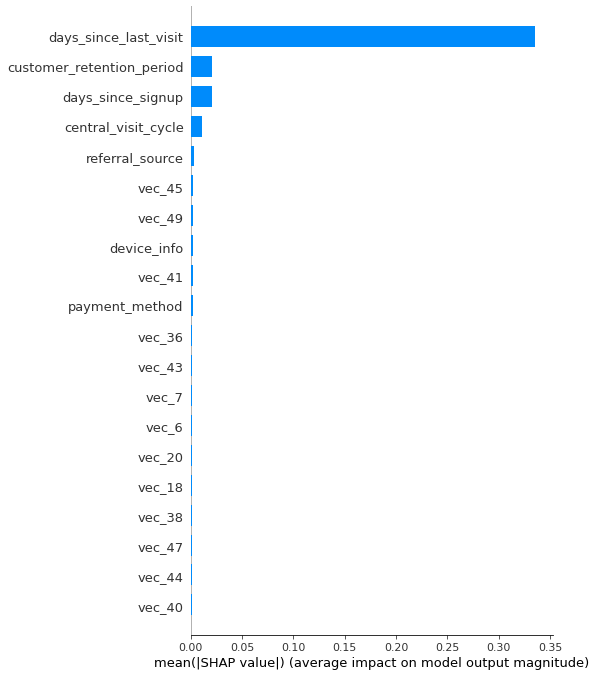

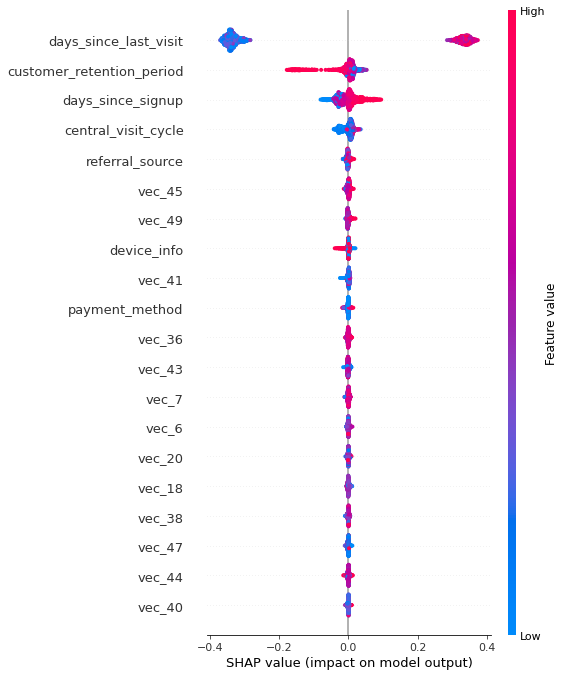

In [22]:
import shap
import matplotlib.pyplot as plt

# SHAP explainer 생성 (랜덤 포레스트 모델 사용)
explainer = shap.TreeExplainer(best_rf)  # 이미 학습된 랜덤 포레스트 모델 (best_rf)
shap_values = explainer.shap_values(X_test)

# SHAP summary plot: 특성의 중요도 시각화
shap.summary_plot(shap_values[1], X_test, plot_type="bar")

# SHAP summary plot: 상세한 전체 SHAP 값 시각화 (feature impact)
shap.summary_plot(shap_values[1], X_test)
